In [6]:
import numpy as np
import os
import re
from sklearn.metrics import accuracy_score
import opensmile
import matplotlib.pyplot as plt

In [7]:
## Variables Defined
path=r"D:\PRML"

train_path=os.path.join(path,"train","train")
test_path=os.path.join(path,"test","test")

In [8]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,   ## Geneva Minimalistic Acoustic Parameter Set
    feature_level=opensmile.FeatureLevel.Functionals,
)

## For Full Dataset

In [9]:
count_male=0
count_female=0

lang=[]
count_male_vect=[]
count_female_vect=[]
for folder in os.listdir(train_path):
    folder_path=os.path.join(train_path,folder)
    for file in os.listdir(folder_path):
        if(re.search("_f_",file)):
            count_female+=1
            
        elif(re.search("_m_",file)):
            count_male+=1
    count_male_vect.append(count_male)
    count_female_vect.append(count_female)
    count_female=0
    count_male=0
    lang.append(str(folder))

Female data [3780, 3780, 3780]
Male data= [3780, 3780, 3780]


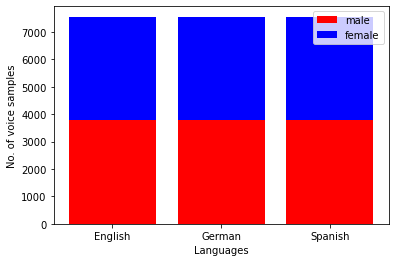

In [10]:
plt.bar(lang,count_male_vect,color='r')
plt.bar(lang,count_female_vect,bottom=count_male_vect,color='b')
print("Female data",count_female_vect)
print("Male data=",count_male_vect)

plt.legend(["male","female"])
plt.xlabel("Languages")
plt.ylabel("No. of voice samples")
plt.show()

## Training

In [11]:
max_count=3780*2  ## No. of examples to use for training
true_values=[]
count=0
count_male=0
count_female=0
features=[]
flag=0
lang=[]
count_male_vect=[]
count_female_vect=[]
for folder in os.listdir(train_path):
    folder_path=os.path.join(train_path,folder)
    for file in os.listdir(folder_path):
        if(count==max_count):
            break
        if(re.search("_f_",file)):
            if(count_female>=max_count/2):
                continue
            count_female+=1
            if(count_female==max_count/2):
                print("Female for "+str(folder)+" done")

        elif(re.search("_m_",file)):
            if(count_male>=max_count/2):
                continue
            count_male+=1
            if(count_male==max_count/2):
                print("Male for "+str(folder)+" done")
        
        file_path=os.path.join(folder_path,file)
        y=smile.process_file(file_path)
        file_features=np.asarray(y)
        if flag==0:
            features=file_features
            flag=-1
        else:
            features=np.concatenate((features,file_features),axis=0)
        if(re.match("de",file)):
            true_values.append(0)
        elif(re.match("en",file)):
            true_values.append(1)
        elif(re.match("es",file)):
            true_values.append(2)
        count+=1
    
    count_male_vect.append(count_male)
    count_female_vect.append(count_female)
    count=0
    count_female=0
    count_male=0
    lang.append(str(folder))
    print(str(folder)+" Done")
true_values=np.array(true_values)   


print("Feature Extraction Done")
        


Exception ignored on calling ctypes callback function: <function OpenSMILE.external_sink_set_callback_ex.<locals>.internal_callback_ex at 0x0000019CF2A01C10>
Traceback (most recent call last):
  File "c:\Users\Asus\anaconda3\lib\site-packages\opensmile\core\SMILEapi.py", line 362, in internal_callback_ex
    def internal_callback_ex(data, nt, n, meta: POINTER(FrameMetaData), _):
KeyboardInterrupt: 
c:\Users\Asus\anaconda3\lib\site-packages\opensmile\core\smile.py:308: UserWarning: Segment too short, filling with NaN.
  warnings.warn(


In [ ]:
plt.bar(lang,count_male_vect,color='r')
plt.bar(lang,count_female_vect,bottom=count_male_vect,color='b')
plt.legend(["male","female"])
plt.xlabel("Languages")
plt.ylabel("No. of voice samples")
plt.show()

In [ ]:
print(features.shape)
print(true_values.shape)

## Testing

In [ ]:
true_values_test=[]
test_features=[]
count=0
flag=0
lang=[]
count_male=0
count_female=0
count_male_vect=[]
count_female_vect=[]
for folder in os.listdir(test_path):
    folder_path=os.path.join(test_path,folder)
    for file in os.listdir(folder_path):
        file_path=os.path.join(folder_path,file)

        if(re.search("_f_",file)):
            count_female+=1
        elif(re.search("_m_",file)):
            count_male+=1

        y=smile.process_file(file_path)
        file_features=np.asarray(y)

        if flag==0:
            test_features=file_features
            flag=-1
        else:
            test_features=np.concatenate((test_features,file_features),axis=0)

        if(re.match("de",file)):
            true_values_test.append(0)
        elif(re.match("en",file)):
            true_values_test.append(1)
        elif(re.match("es",file)):
            true_values_test.append(2)

        count+=1
        
    count_male_vect.append(count_male)
    count_female_vect.append(count_female)
    count=0
    count_female=0
    count_male=0
    lang.append(str(folder))
true_values_test=np.array(true_values_test)   

print(count)
print("Feature Extraction Done")
        


In [ ]:
plt.bar(lang,count_male_vect,color='r')
plt.bar(lang,count_female_vect,bottom=count_male_vect,color='b')
plt.legend(["male","female"])
plt.xlabel("Languages")
plt.ylabel("No. of voice samples")
plt.show()

## Getting only required Features

In [ ]:
res=np.array([24,38,58,60,68,70,76,78])
 
# 24= mfcc sma3 mean
# 38= log RelF0-H1-A3_sma3_nz_amean
# 58= AlphaRatioV_sma3_nz_amean
# 60= hammerberg index_sma3_nz_amean
# 68= mfcc1V sma3nz amean
# 70= mfcc2V sma3nz amean
# 76= alphaRatioUV_sma3_nz_amean
# 78= slopeUV0-500 sma3nz amean 

res.T
features=features[:,res]
test_features=test_features[:,res]

In [ ]:
# fig,ax=plt.subplots()
# ax = plt.subplot(111, projection='3d')
# ax.scatter(features[:,0],features[:,1],c=true_values)
# ax.legend(["1","0","2"])
# fig.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# Linear


In [ ]:
from sklearn.svm import SVC

pipe4 = Pipeline([ ('std', StandardScaler()), ('SVM', SVC(kernel='linear',probability=True))])
pipe4.fit(features, true_values)
pred_test=pipe4.predict(test_features)
pred_train=pipe4.predict(features)


In [ ]:
score=accuracy_score(true_values_test, pred_test)
print("Accuracy  on test data",score)


from sklearn.metrics import confusion_matrix
cf=confusion_matrix(true_values_test,pred_test)

import seaborn as sb
labels=["German","English","Spanish"]
sb.heatmap(cf,annot=True,xticklabels=labels,yticklabels=labels)